<a href="https://colab.research.google.com/github/Maram00ali/REV4RE/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gensim

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install numpy 1.21.5

ERROR: Could not find a version that satisfies the requirement 1.21.5 (from versions: none)
ERROR: No matching distribution found for 1.21.5
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset path")

In [ ]:
df.head()

,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able to customize and decorate a ton of things...,1
3,All I can say is this game is the best!!,1
4,"Although not the best, it better for own creat...",1


In [ ]:
top_data_df = pd.read_csv('/work/Relavence_labeld_Dataset.csv')
print("Columns in the original dataset:\n")
print(top_data_df.columns)

Columns in the original dataset:

Index(['Review', 'RivewRelevance'], dtype='object')


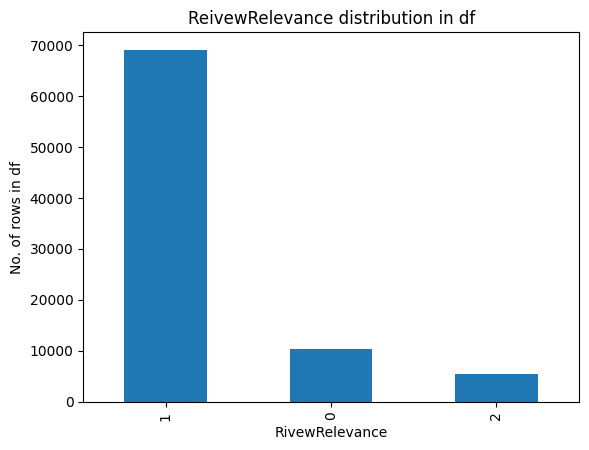

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
pd.value_counts(top_data_df['RivewRelevance']).plot.bar(title="ReivewRelevance distribution in df")
plt.xlabel("RivewRelevance")
plt.ylabel("No. of rows in df")
plt.show()

In [ ]:
# Function to retrieve top few number of each category
def get_top_data(top_n = 5000):
    top_data_df_relevent = top_data_df[top_data_df['RivewRelevance'] == 1].head(top_n)
    top_data_df_irrelvent= top_data_df[top_data_df['RivewRelevance'] == 0].head(top_n)
    top_data_df_mix = top_data_df[top_data_df['RivewRelevance'] == 2].head(top_n)
    top_data_df_small = pd.concat([top_data_df_relevent, top_data_df_irrelvent, top_data_df_mix])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = top_data_df

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each RivewRelevance:")
print(top_data_df_small['RivewRelevance'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each RivewRelevance:
1    69045
0    10352
2     5535
Name: RivewRelevance, dtype: int64


,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able to customize and decorate a ton of things...,1
3,All I can say is this game is the best!!,1
4,"Although not the best, it better for own creat...",1
5,asks literally every time you open the app if ...,1
6,"Awesome tool for home owners, realtors, design...",1
7,"Been using for a few hours so far, it’s not us...",2
8,Bored at home dont know what to do?\n\nGet thi...,1
9,Dear Room Planner\nI love this app so much!You...,1


In [ ]:
# Importing NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk import *

In [ ]:
# Declaring function for text preprocessing

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('english')
  df_1['Review'] = df_1['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # remove punctuations and convert to lower case
  #df_1['Review'] = df_1['Review'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))

  # remove double spaces
  #df_1['Review'] = df_1['Review'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1

In [ ]:
# Preprocessing training and test data
top_data_df_small = preprocess_text(top_data_df_small)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
top_data_df_small

,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able customize decorate ton things even free! ...,1
3,All I say game best!!,1
4,"Although best, better creatives.",1
...,...,...
84927,Your app sucks.Im deleting it.I know I'm getti...,1
84928,Your app wait along process downloads west dat...,1
84929,Your customer service unresponsive. I email go...,1
84930,Your new desktop version sucks. I save send in...,1


In [ ]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

I like food!!
This product good!!


In [ ]:

from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['Review']]
print(top_data_df_small['tokenized_text'].head(10))

0                                    [star, good, app]
1                 [monthly, subscription, fee, really]
2    [able, customize, decorate, ton, things, even,...
3                               [all, say, game, best]
4                  [although, best, better, creatives]
5    [asks, literally, every, time, open, app, want...
6    [awesome, tool, home, owners, realtors, design...
7    [been, using, hours, far, it, user, friendly, ...
8    [bored, home, dont, know, do, get, app, asap, ...
9    [dear, room, planner, love, app, much, you, ma...
Name: tokenized_text, dtype: object


In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = top_data_df_small['tokenized_text']
top_data_df_small['stemmed_tokens'].head(10)

0                                    [star, good, app]
1                 [monthly, subscription, fee, really]
2    [able, customize, decorate, ton, things, even,...
3                               [all, say, game, best]
4                  [although, best, better, creatives]
5    [asks, literally, every, time, open, app, want...
6    [awesome, tool, home, owners, realtors, design...
7    [been, using, hours, far, it, user, friendly, ...
8    [bored, home, dont, know, do, get, app, asap, ...
9    [dear, room, planner, love, app, much, you, ma...
Name: stemmed_tokens, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.20, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['stemmed_tokens']],
                                                        top_data_df_small['RivewRelevance'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=42)
    print("Value counts for Train RivewRelevance")
    print(Y_train.value_counts())
    print("Value counts for Test RivewRelevance")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train RivewRelevance
1    55298
0     8244
2     4403
Name: RivewRelevance, dtype: int64
Value counts for Test RivewRelevance
1    13747
0     2108
2     1132
Name: RivewRelevance, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                     stemmed_tokens
0  61303  [this, app, bug, performing, quiz, get, stuck,...
1   9118  [bought, bra, aliexpress, but, smell, bad, eve...
2  56031  [honestly, used, app, thw, ui, confusing, real...
3  19571      [now, google, translate, working, tried, lot]
4  10948  [love, hair, going, order, more, nice, communi...


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

/shared-libs/python3.8/py/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device available for running: 
cpu


In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()

        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return F.softmax(out, dim=1)

In [ ]:
from gensim import corpora
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict

# Make the dictionary without padding for the basic models
review_dict = make_dict(top_data_df_small, padding=False)


Dictionary without padding


In [ ]:
VOCAB_SIZE = 30056
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

In [ ]:
# Function to get the output tensor
def make_target(label):
    if label == 0:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 1:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

In [ ]:
VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 1

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)

In [ ]:
# Open the file for writing loss
ffnn_loss_file_name = 'ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Start training
for epoch in range(num_epochs):
    if (epoch+1) % 25 == 0:
        print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        optimizer.zero_grad()

        # Make the bag of words vector for stemmed tokens
        bow_vec = make_bow_vector(review_dict,row['stemmed_tokens'])
         # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['RivewRelevance'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0

f.close()


In [ ]:
from sklearn.metrics import classification_report
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['RivewRelevance'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
#ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
#fig = ffnn_plt_500_padding_100_epochs.get_figure()
#fig.savefig( 'plots/' + "ffnn_bow_loss_500_padding_100_epochs_less_lr.pdf")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2108
           1       0.81      1.00      0.89     13747
           2       0.00      0.00      0.00      1132

    accuracy                           0.81     16987
   macro avg       0.27      0.33      0.30     16987
weighted avg       0.65      0.81      0.72     16987

1
Index(['iter', ' loss'], dtype='object')
/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original_lables_ff_bow, bow_ff_nn_predictions)
print(cm)

[[    0  2108     0]
 [    0 13747     0]
 [    0  1132     0]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=378be7ce-053e-4e53-a8d7-d43f011c835b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>